# Exploratory Analysis: House Price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.offline as pyoff
import plotly.express as px
import plotly.graph_objects as go

In [2]:
sns.set(color_codes=True)

In [3]:
df = pd.read_csv("train.csv", index_col=0)

In [4]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# Functions

### Categorical features

In [5]:
def box_count_price_plot(col, data, size, order):
    clr = sns.color_palette("husl", data[col].nunique())
    fig, (ax_hist, ax_box) = plt.subplots(2, figsize=size, sharex=True, gridspec_kw={"height_ratios": (.30, .70)})
    sns.boxplot(x=col, y="SalePrice", data=data, order=order, palette=clr, ax=ax_box)
    sns.countplot(x=col, data=data, order=order, palette=clr, ax=ax_hist)
    for p in ax_hist.patches:
        height = p.get_height()
        ax_hist.text(p.get_x()+p.get_width()/2., height + 3, '{:1.1f}%'.format(height/len(data)*100), ha="center")
    plt.yticks(np.arange(0, 1000000, 100000), ("0k", "100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k", "900k"))
    ax_hist.set_xlabel(None)

In [6]:
def heatmap_OverallCond(col, data, order):
    htmpCond = pd.DataFrame(columns=order, index=np.arange(9,0,-1))
    for c in htmpCond.columns:
        htmpCond.loc[:,c] = data[data[col] == c]["OverallCond"].value_counts()/len(data[data[col] == c])*100
    return htmpCond

In [7]:
def heatmap_OverallQual(col, data, order):
    htmpQual = pd.DataFrame(columns=order, index=np.arange(9,0,-1))
    for c in htmpQual.columns:
        htmpQual.loc[:,c] = data[data[col] == c]["OverallQual"].value_counts()/len(data[data[col] == c])*100
    return htmpQual

In [8]:
def sctr(htmp, col, by):
    sctr = pd.DataFrame(index=range(0, len(htmp.columns)*len(htmp.index)-htmp.isna().sum().sum()))
    k = 0
    for c in range(len(htmp.columns)):
        for i in htmp.index:
            if not np.isnan(htmp.loc[i,htmp.columns[c]]):
                sctr.loc[k,col] = htmp.columns[c]
                sctr.loc[k,"num"] = c
                sctr.loc[k,by] = i
                sctr.loc[k,"value"] = htmp.loc[i,htmp.columns[c]]
                k += 1
    return sctr

In [9]:
def box_count_overall_condition_plot(col, data, size, order):
    fig, (ax_hist, ax_scatter1, ax_scatter2, ax_swarm, ax_box) = plt.subplots(5, figsize=size, sharex=True, gridspec_kw={"height_ratios": (.1, .15, .15, .4, .4)})
    clr = sns.color_palette("husl", data[col].nunique())
    sctrCond = sctr(heatmap_OverallCond(col,data,order), col, "OverallCond")
    sctrQual = sctr(heatmap_OverallQual(col,data,order), col, "OverallQual")
    sns.scatterplot(x="num", y="OverallCond", hue=col, size="value", sizes=(100, 2000), data=sctrCond, ax=ax_scatter1, palette=clr) 
    ax_scatter1.legend_.remove()
    ax_scatter1.grid(b=None, which='major', axis='x')
    sns.scatterplot(x="num", y="OverallQual", hue=col, size="value", sizes=(100, 2000), data=sctrQual, ax=ax_scatter2, palette=clr) 
    ax_scatter2.legend_.remove()
    ax_scatter2.grid(b=None, which='major', axis='x')
    sns.swarmplot(x=col, y="YearBuilt", data=data, order=order, palette=clr, ax=ax_swarm)
    sns.boxplot(x=col, y="SalePrice", data=data, order=order, palette=clr, ax=ax_box)
    ax_box.set_yticks(np.arange(0, 900000, 100000))
    ax_box.set_yticklabels(("0k", "100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))
    sns.countplot(x=col, data=data, order=order, palette=clr, ax=ax_hist)
    for p in ax_hist.patches:
        height = p.get_height()
        ax_hist.text(p.get_x()+p.get_width()/2., height + 3, '{:1.1f}%'.format(height/len(data)*100), ha="center")
    ax_hist.set_xlabel(None)
    ax_box.set_xlabel(None)
    ax_swarm.set_xlabel(None)
    ax_scatter1.set_xlabel(None)
    ax_scatter2.set_xlabel(None)

### Numeric features

In [10]:
def hist_percentage_plot(col, data, bins):
    ax_hist = sns.distplot(data[col], kde=False, bins=bins,
                           hist_kws={"align": "mid", "rwidth": 0.8})
    for p in ax_hist.patches:
        height = p.get_height()
        ax_hist.text(p.get_x()+p.get_width()/2., height + 1, '{:1.1f}%'.format(height/len(data)*100), ha="center")

### Both

In [11]:
def scatter_class_plot(x, y, cat, data, binsx, binsy):
    grid = sns.JointGrid(x=x, y=y, data=data)
    g = grid.plot_joint(sns.scatterplot, hue=cat, data=data)
    for c in data[cat].unique():
        sns.distplot(data.loc[data[cat]==c, x], ax=g.ax_marg_x, kde=False, bins=binsx)
        sns.distplot(data.loc[data[cat]==c, y], ax=g.ax_marg_y, vertical=True, kde=False, bins=binsy)
    g.ax_marg_x.set_xlabel(None)
    g.ax_marg_y.set_ylabel(None)

# Features explorations

## Target : SalePrice

In [12]:
price = "SalePrice"

In [13]:
df[price].describe(), df[price].median()

(count      1460.000000
 mean     180921.195890
 std       79442.502883
 min       34900.000000
 25%      129975.000000
 50%      163000.000000
 75%      214000.000000
 max      755000.000000
 Name: SalePrice, dtype: float64, 163000.0)

Seems there are no particular anomalies in SalePrice feature.

In [14]:
# Calculate median
df[price].median()

163000.0

([<matplotlib.axis.XTick at 0x284aec8f390>,
 <a list of 8 Text xticklabel objects>)

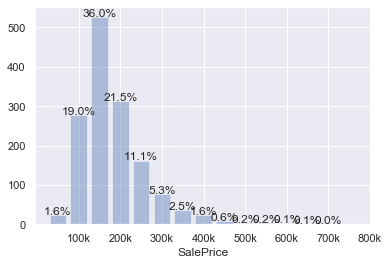

In [15]:
hist_percentage_plot(price, df, bins=np.arange(50000, 800000, 50000)-25000)
plt.xticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))

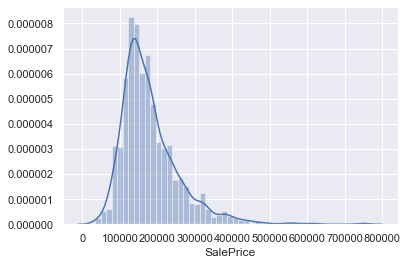

In [16]:
#histogram
sns.distplot(df['SalePrice']);

Slightly deviated from normal distribution, has positive skew and peak.

In [17]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Missing values

In [18]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total NaN Values', 'Percentage of NaN Values'])
missing = missing_data(df)
missing.head(20)

Total NaN Values  Percentage of NaN Values
PoolQC                    1453                 99.520548
MiscFeature               1406                 96.301370
Alley                     1369                 93.767123
Fence                     1179                 80.753425
FireplaceQu                690                 47.260274
LotFrontage                259                 17.739726
GarageType                  81                  5.547945
GarageCond                  81                  5.547945
GarageFinish                81                  5.547945
GarageQual                  81                  5.547945
GarageYrBlt                 81                  5.547945
BsmtFinType2                38                  2.602740
BsmtExposure                38                  2.602740
BsmtQual                    37                  2.534247
BsmtCond                    37                  2.534247
BsmtFinType1                37                  2.534247
MasVnrArea                   8                  0.547945
MasVnrType                   8                  0.547945
Electrical                   1                  0.068493
RoofMatl                     0                  0.000000

By observing their percentage of missing values, we can assume that PoolQC, MiscFeature, Alley and Fence should be dropped. We need to explore other features to find out if they should be dropped or we could fix and use them.

## Correlations
### Correlation matrix using heatmap

In [22]:
#correlation matrix
corr = df.corr()
fig = go.Figure(data=go.Heatmap(z=corr, x=corr.columns, y=corr.columns))
fig.update_layout(
    title="Correlation matrix",
    autosize=False,
    width=800,
    height=800
)
fig.show()

In [23]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
fig = go.Figure(data=go.Heatmap(z=cm, x=cols.values, y=cols.values))
fig.update_layout(title="Most correlated values heatmap",
    width=500,
    height=500
)
fig.show()

### Scatter matrix

In [24]:
# Scatter matrix of correlated features
cols = ["SalePrice", "OverallQual", "GrLivArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd"]
fig = px.scatter_matrix(df[cols])
fig.update_layout(title="Scatterplot of Sale Price and correlated values",
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')
fig.show()

### LotFrontage

In [25]:
col = "LotFrontage"

In [26]:
df[col].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [27]:
df[col].isnull().sum()

259

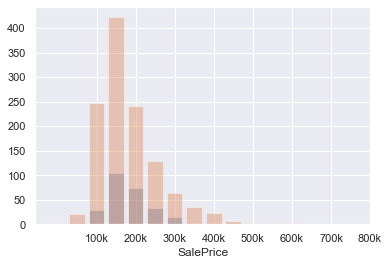

In [28]:
null = df[df[col].isnull()==True]
nnull = df[df[col].isnull()==False]
sns.distplot(null[price], kde=False, bins=np.arange(0, 800000, 50000)-25000, hist_kws={"align": "mid", "rwidth": 0.8})
sns.distplot(nnull[price], kde=False, bins=np.arange(0, 800000, 50000)-25000, hist_kws={"align": "mid", "rwidth": 0.8})
plt.xticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))
plt.savefig("visualizations/{}_01.png".format(col), dpi=600, bbox_inches="tight")

([<matplotlib.axis.YTick at 0x284b22872b0>,
 <a list of 0 Text yticklabel objects>)

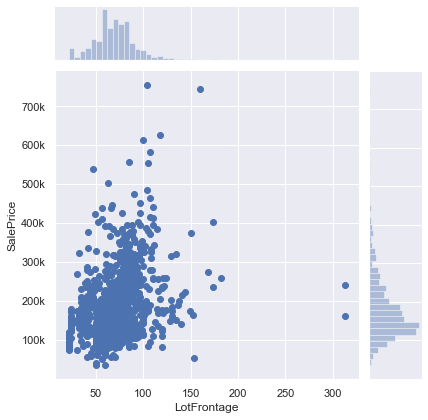

In [29]:
sns.jointplot(x=col, y=price, data=df)
plt.yticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))

In [30]:
df2 = df[df[col]<300]

In [31]:
#Deleting outliers
df = df.drop(df[(df[col]>300) & (df[col]<300000)].index)

([<matplotlib.axis.YTick at 0x284b2269668>,
 <a list of 0 Text yticklabel objects>)

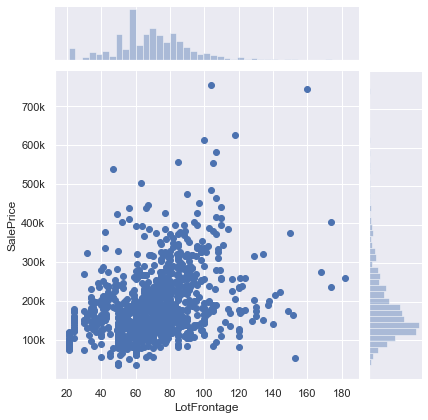

In [32]:
sns.jointplot(x=col, y=price, data=df2)
plt.yticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))

Linear relationship

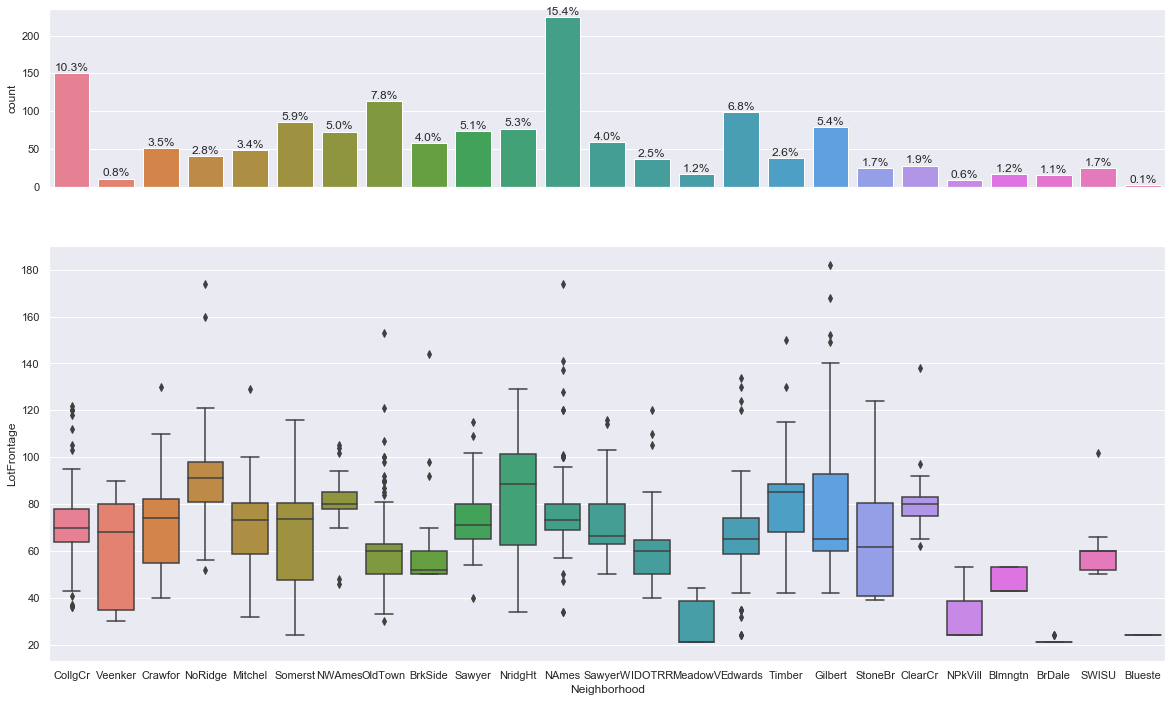

In [33]:
clr = sns.color_palette("husl", df["Neighborhood"].nunique())
fig, (ax_hist, ax_box) = plt.subplots(2, figsize=[20,12], sharex=True, gridspec_kw={"height_ratios": (.30, .70)})
sns.boxplot(x="Neighborhood", y=col, data=df, palette=clr, ax=ax_box)
sns.countplot(x="Neighborhood", data=df, palette=clr, ax=ax_hist)
for p in ax_hist.patches:
    height = p.get_height()
    ax_hist.text(p.get_x()+p.get_width()/2., height + 3, '{:1.1f}%'.format(height/len(df)*100), ha="center")
ax_hist.set_xlabel(None)
plt.savefig("visualizations/{}_02.png".format(col), dpi=600, bbox_inches="tight")

### FireplaceQu

In [34]:
col = "FireplaceQu"

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [35]:
df[col].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [36]:
# Replace NaN values with string "No"
df[col] = df[col].fillna("No")

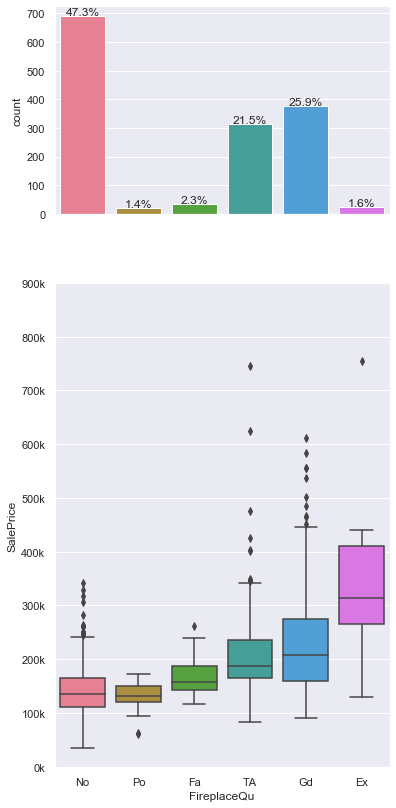

In [37]:
box_count_price_plot(col, df, [6,14], ["No","Po","Fa","TA","Gd","Ex"])
plt.savefig("visualizations/{}_01.png".format(col), dpi=600, bbox_inches="tight")

In [38]:
df[col].value_counts().kurt(), df[col].value_counts().skew()

(-0.06717086416892482, 0.9328995818596565)

FireplaceQu is relevant for infering SalePrice. We should transform this categorical feature in a numeric one: from 0 (No) to 5 (Ex).

### Garage

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

For GarageType, GarageFinish, GarageQual and GarageCond features, since they are all categorical values and the NaN values represent the absence of spacific feature, we will replace missing values with "No".

In [39]:
for feature in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    df[feature] = df[feature].fillna('No')

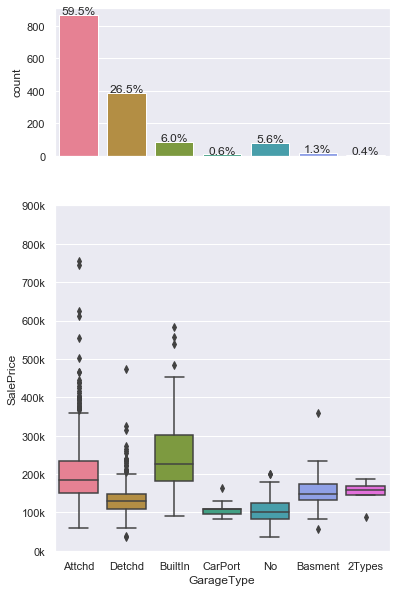

In [40]:
box_count_price_plot("GarageType", df, [6,10], df["GarageType"].unique())
#plt.savefig("visualizations/{}_01.png".format(col), dpi=600, bbox_inches="tight")

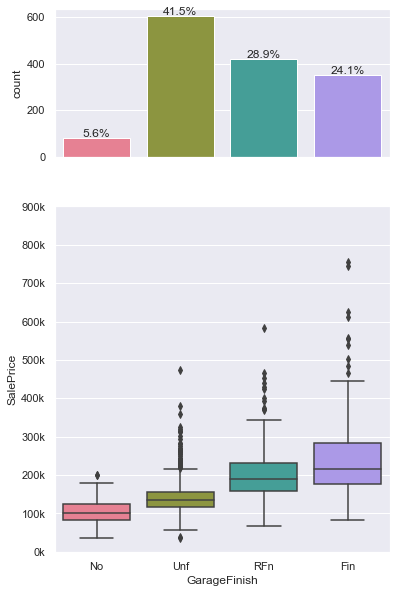

In [41]:
box_count_price_plot("GarageFinish", df, [6,10], ["No","Unf","RFn","Fin"])
#plt.savefig("visualizations/{}_01.png".format(col), dpi=600, bbox_inches="tight")

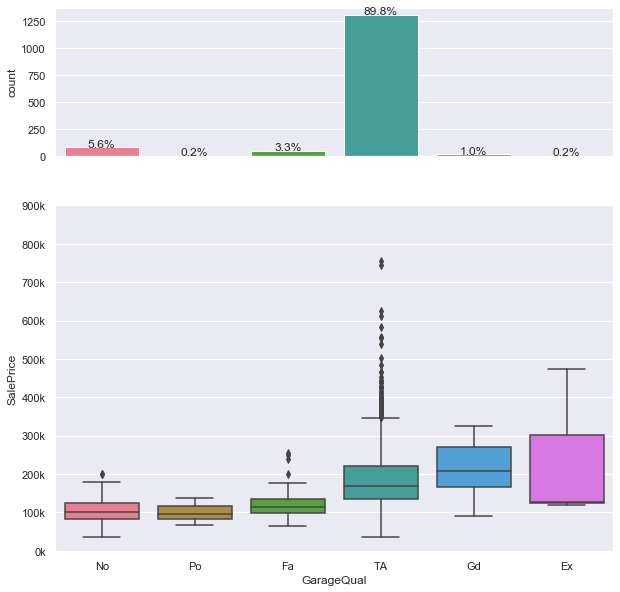

In [42]:
box_count_price_plot("GarageQual", df, [10,10], ["No","Po","Fa","TA","Gd","Ex"])
#plt.savefig("visualizations/{}_01.png".format(col), dpi=600, bbox_inches="tight")

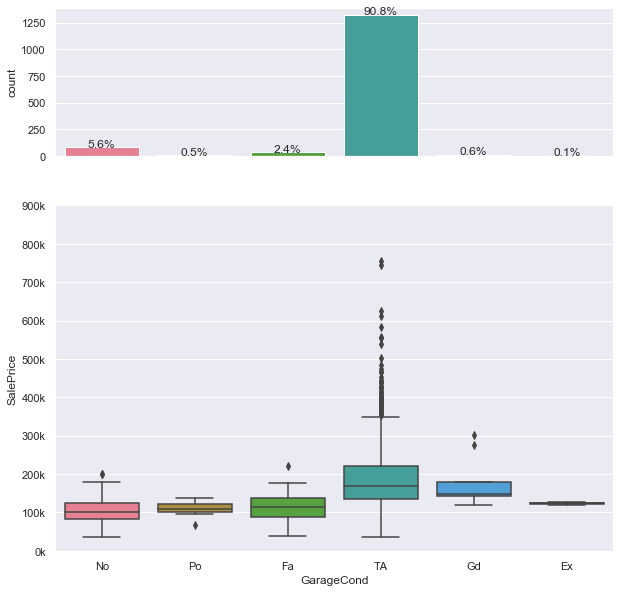

In [43]:
box_count_price_plot("GarageCond", df, [10,10], ["No","Po","Fa","TA","Gd","Ex"])
#plt.savefig("visualizations/{}_01.png".format(col), dpi=600, bbox_inches="tight")

    GarageCars: Size of garage in car capacity

    GarageArea: Size of garage in square feet

    GarageYrBlt: Year garage was built

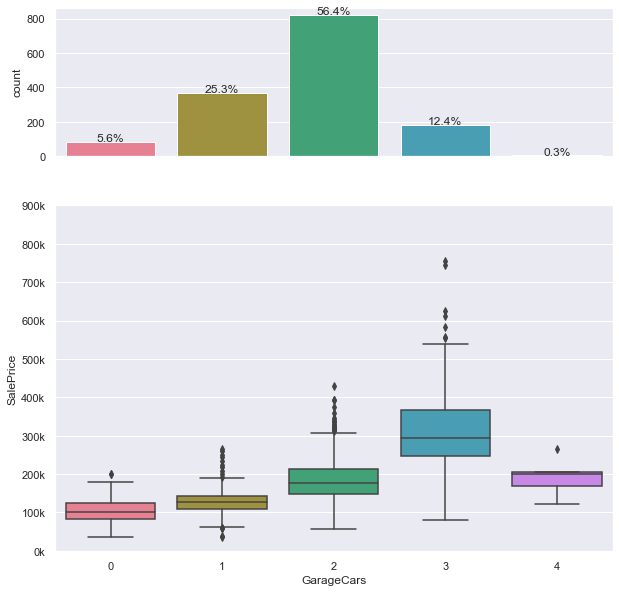

In [44]:
box_count_price_plot("GarageCars", df, [10,10], range(0,5))

([<matplotlib.axis.YTick at 0x284b2867a20>,
 <a list of 0 Text yticklabel objects>)

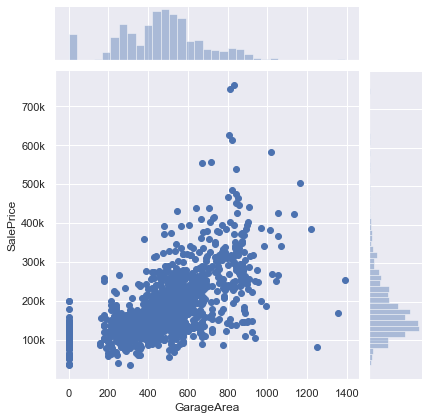

In [45]:
sns.jointplot(x="GarageArea", y=price, data=df)
plt.yticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))

([<matplotlib.axis.YTick at 0x284b2a8efd0>,
 <a list of 0 Text yticklabel objects>)

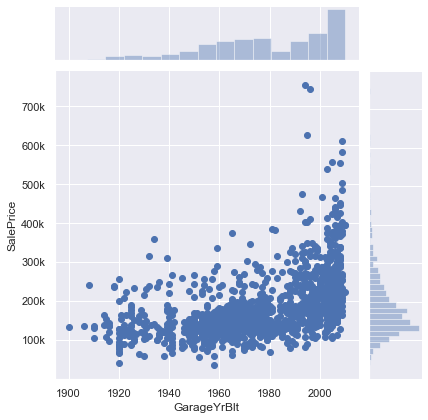

In [46]:
sns.jointplot(x="GarageYrBlt", y=price, data=df)
plt.yticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))

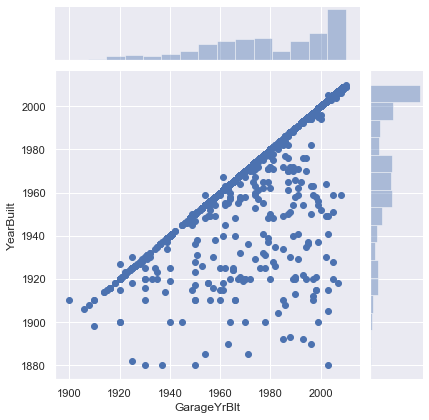

In [47]:
sns.jointplot(x="GarageYrBlt", y="YearBuilt", data=df)

#### GrLivArea

In [48]:
col = "GrLivArea"
df[col].describe()

count    1458.000000
mean     1512.253772
std       514.393652
min       334.000000
25%      1128.500000
50%      1461.500000
75%      1776.000000
max      4676.000000
Name: GrLivArea, dtype: float64

Text(0.5, 1.05, 'Outliers')

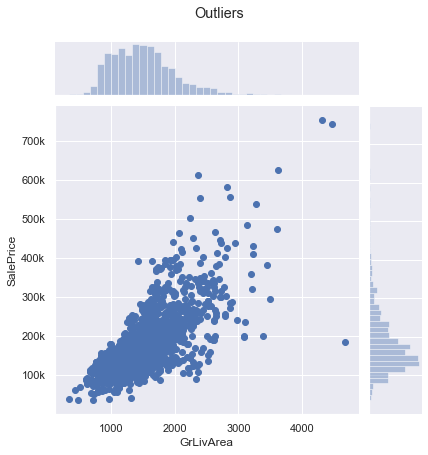

In [49]:
sns.jointplot(x=col, y=price, data=df)
plt.yticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))
plt.suptitle("Outliers",y=1.05)

In [50]:
#Deleting outliers
df = df.drop(df[(df[col]>4000)].index)

Text(0.5, 1.05, 'Without Outliers')

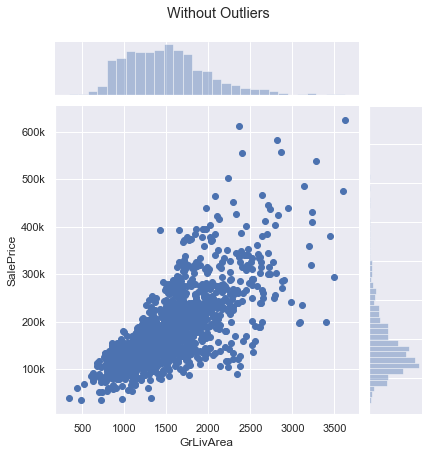

In [51]:
sns.jointplot(x=col, y=price, data=df)
plt.yticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))
plt.suptitle("Without Outliers",y=1.05)

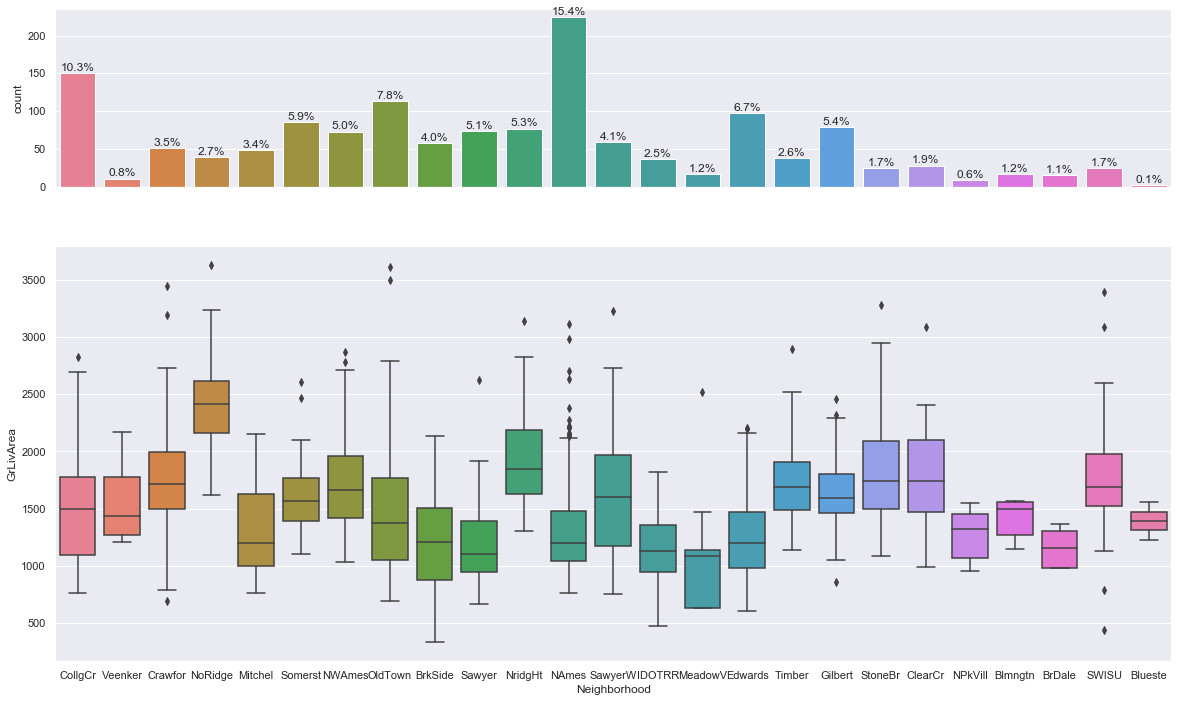

In [52]:
clr = sns.color_palette("husl", df["Neighborhood"].nunique())
fig, (ax_hist, ax_box) = plt.subplots(2, figsize=[20,12], sharex=True, gridspec_kw={"height_ratios": (.30, .70)})
sns.boxplot(x="Neighborhood", y=col, data=df, palette=clr, ax=ax_box)
sns.countplot(x="Neighborhood", data=df, palette=clr, ax=ax_hist)
for p in ax_hist.patches:
    height = p.get_height()
    ax_hist.text(p.get_x()+p.get_width()/2., height + 3, '{:1.1f}%'.format(height/len(df)*100), ha="center")
ax_hist.set_xlabel(None)
plt.savefig("visualizations/{}_02.png".format(col), dpi=600, bbox_inches="tight")

GrLivArea is useful due to clear positive correlation with SalePrice.

### Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement


BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [53]:
for feature in ("BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtQual", "BsmtCond"):
    df[feature] = df[feature].fillna('NoBsmt')

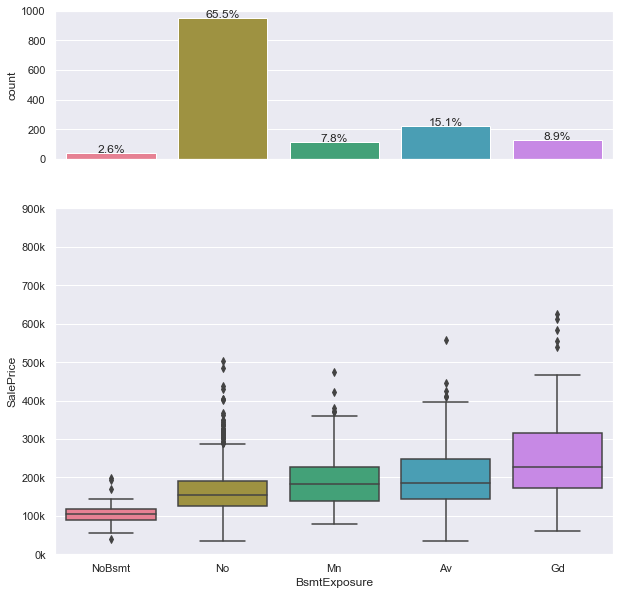

In [54]:
box_count_price_plot("BsmtExposure", df, [10,10], ["NoBsmt","No","Mn","Av","Gd"])

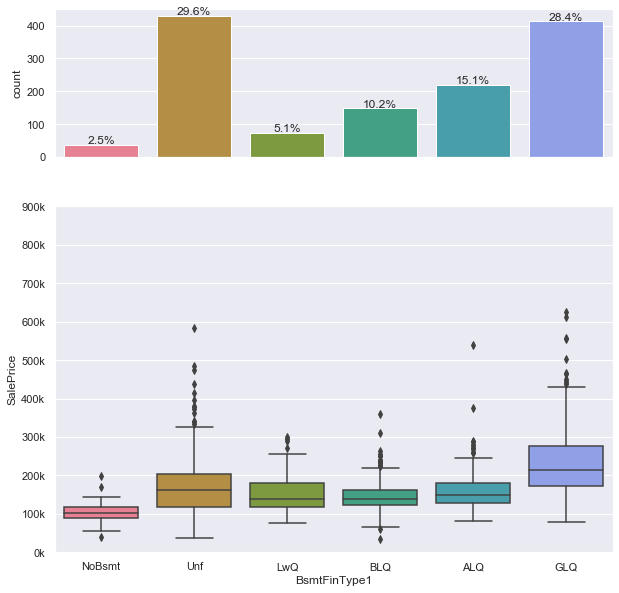

In [55]:
box_count_price_plot("BsmtFinType1", df, [10,10], ["NoBsmt","Unf","LwQ","BLQ","ALQ","GLQ"])

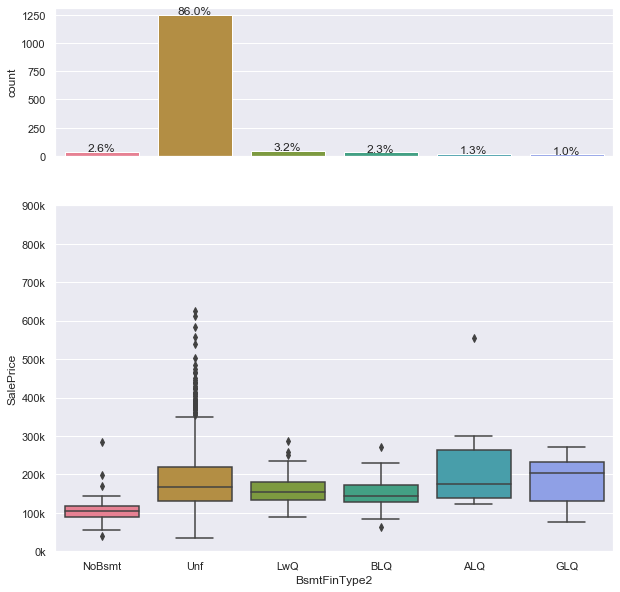

In [56]:
box_count_price_plot("BsmtFinType2", df, [10,10], ["NoBsmt","Unf","LwQ","BLQ","ALQ","GLQ"])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


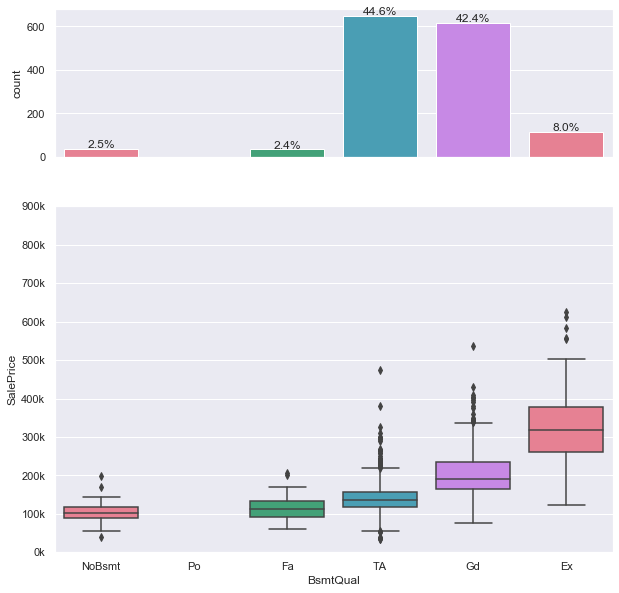

In [57]:
box_count_price_plot("BsmtQual", df, [10,10], ["NoBsmt","Po","Fa","TA","Gd","Ex"])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


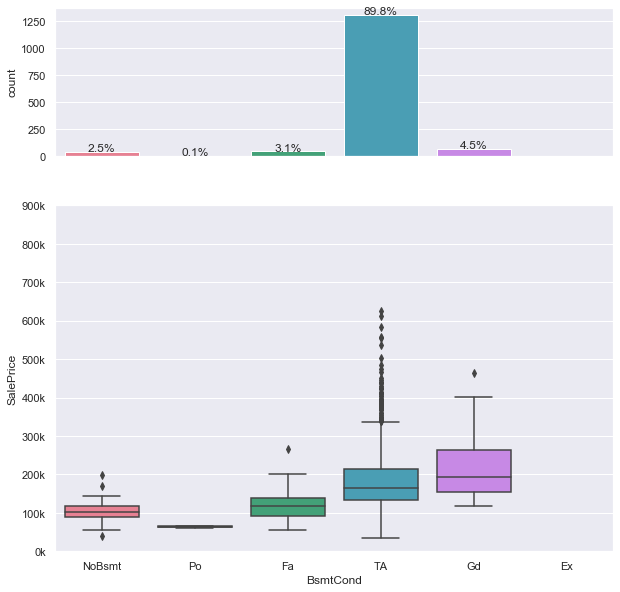

In [58]:
box_count_price_plot("BsmtCond", df, [10,10], ["NoBsmt","Po","Fa","TA","Gd","Ex"])

BsmtFinSF1: Type 1 finished square feet

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

([<matplotlib.axis.YTick at 0x284b4926a58>,
 <a list of 0 Text yticklabel objects>)

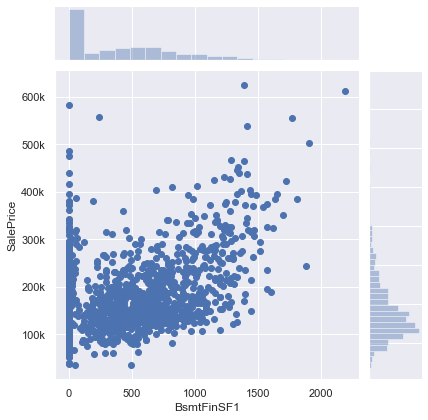

In [59]:
sns.jointplot(x="BsmtFinSF1", y=price, data=df)
plt.yticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))

In [60]:
#Deleting outliers
df = df.drop(df[(df["BsmtFinSF1"]>5000)].index)

([<matplotlib.axis.YTick at 0x284b23324e0>,
 <a list of 0 Text yticklabel objects>)

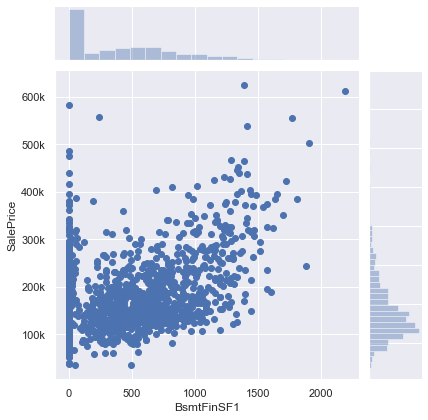

In [61]:
# Plot without outliers
sns.jointplot(x="BsmtFinSF1", y=price, data=df)
plt.yticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))

([<matplotlib.axis.YTick at 0x284b236d3c8>,
 <a list of 0 Text yticklabel objects>)

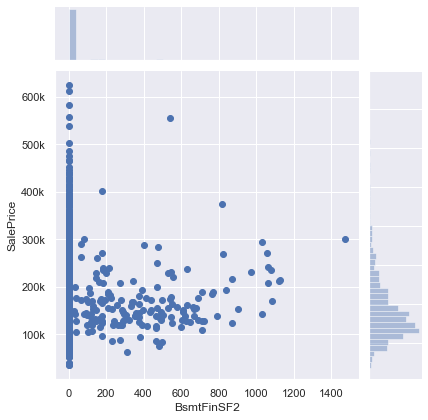

In [62]:
sns.jointplot(x="BsmtFinSF2", y=price, data=df)
plt.yticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))

In [63]:
#Deleting outliers
df = df.drop(df[(df["BsmtFinSF2"]>1400)].index)

([<matplotlib.axis.YTick at 0x284b49c1240>,
 <a list of 0 Text yticklabel objects>)

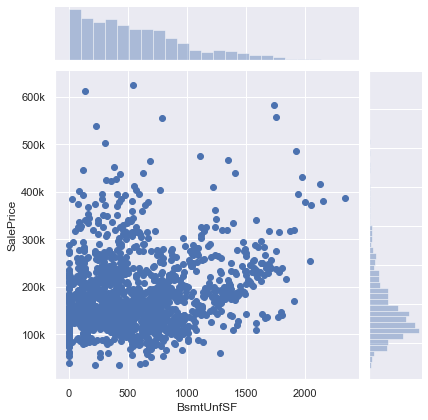

In [64]:
# plot without outliers
sns.jointplot(x="BsmtUnfSF", y=price, data=df)
plt.yticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))

([<matplotlib.axis.YTick at 0x284b200d048>,
 <a list of 0 Text yticklabel objects>)

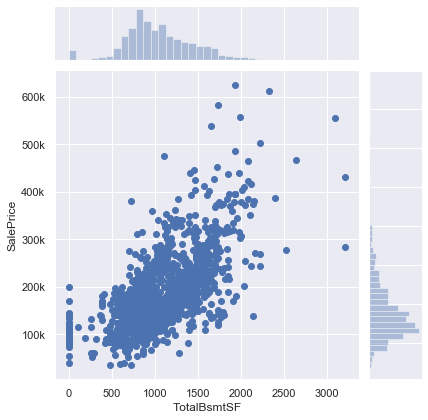

In [65]:
sns.jointplot(x="TotalBsmtSF", y=price, data=df)
plt.yticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))

In [66]:
#Deleting outliers
df = df.drop(df[(df["TotalBsmtSF"]>6000)].index)

([<matplotlib.axis.YTick at 0x284b2d2b160>,
 <a list of 0 Text yticklabel objects>)

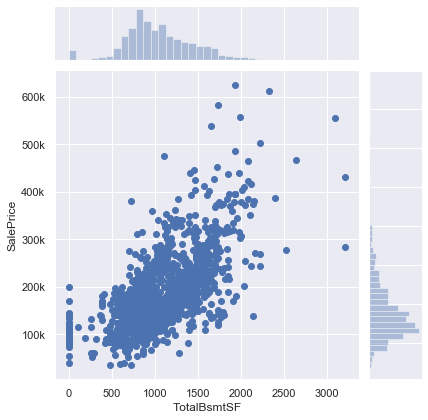

In [67]:
sns.jointplot(x="TotalBsmtSF", y=price, data=df)
plt.yticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))

### Masonry

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

In [68]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")

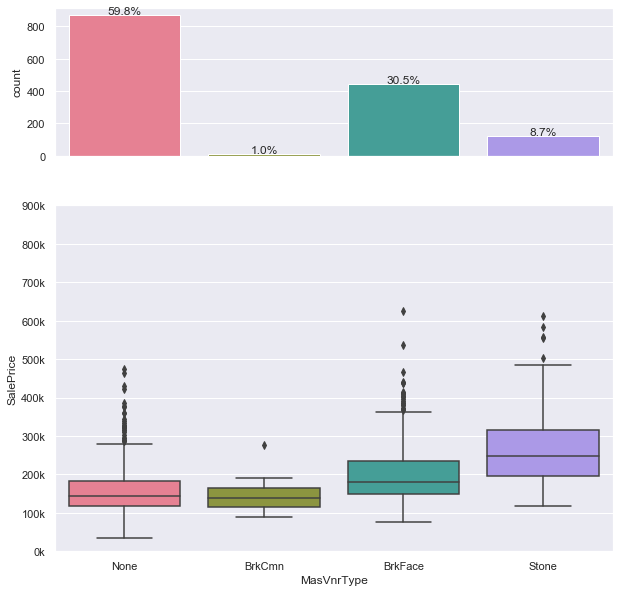

In [69]:
box_count_price_plot("MasVnrType", df, [10,10], ["None","BrkCmn","BrkFace","Stone"])

([<matplotlib.axis.YTick at 0x284b323a470>,
 <a list of 0 Text yticklabel objects>)

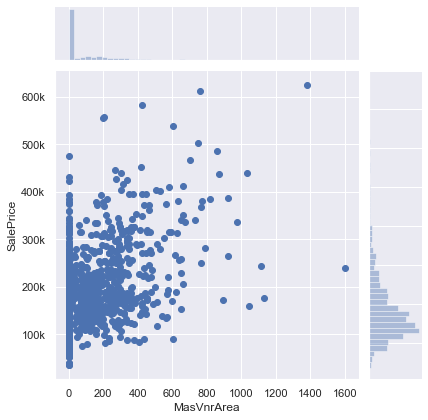

In [70]:
sns.jointplot(x="MasVnrArea", y=price, data=df)
plt.yticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))

## Other features

### Overall Condition & Overall Quality

In [71]:
qual = "OverallQual"
cond = "OverallCond"

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

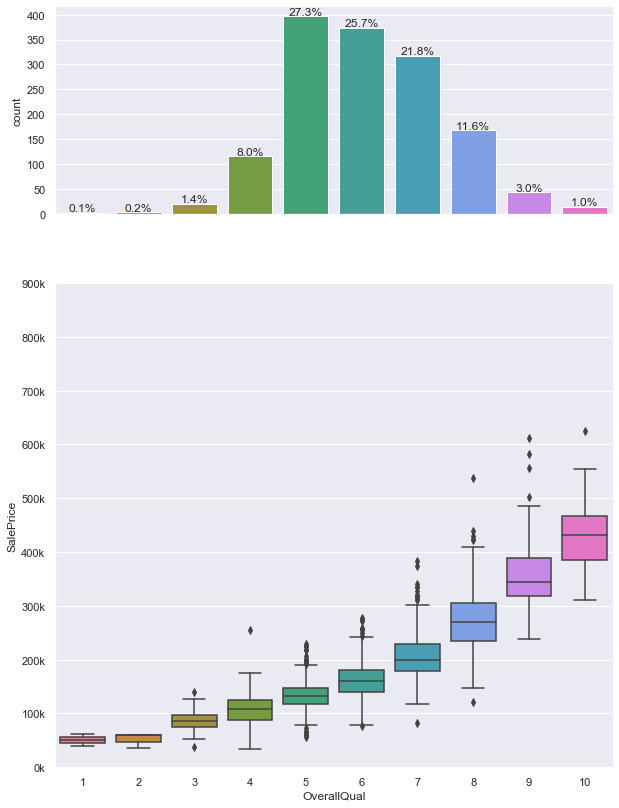

In [72]:
box_count_price_plot(qual, df, [10,14], np.arange(1,11))
plt.savefig("visualizations/{}_01.png".format(qual), dpi=600, bbox_inches="tight")

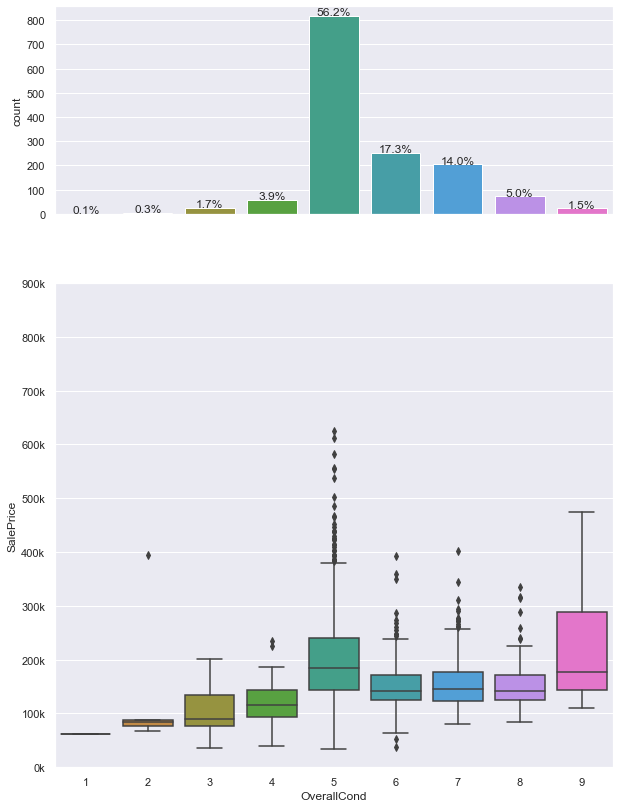

In [73]:
box_count_price_plot(cond, df, [10,14], np.arange(1,10))

### MSSubClass

In [74]:
col = "MSSubClass"

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

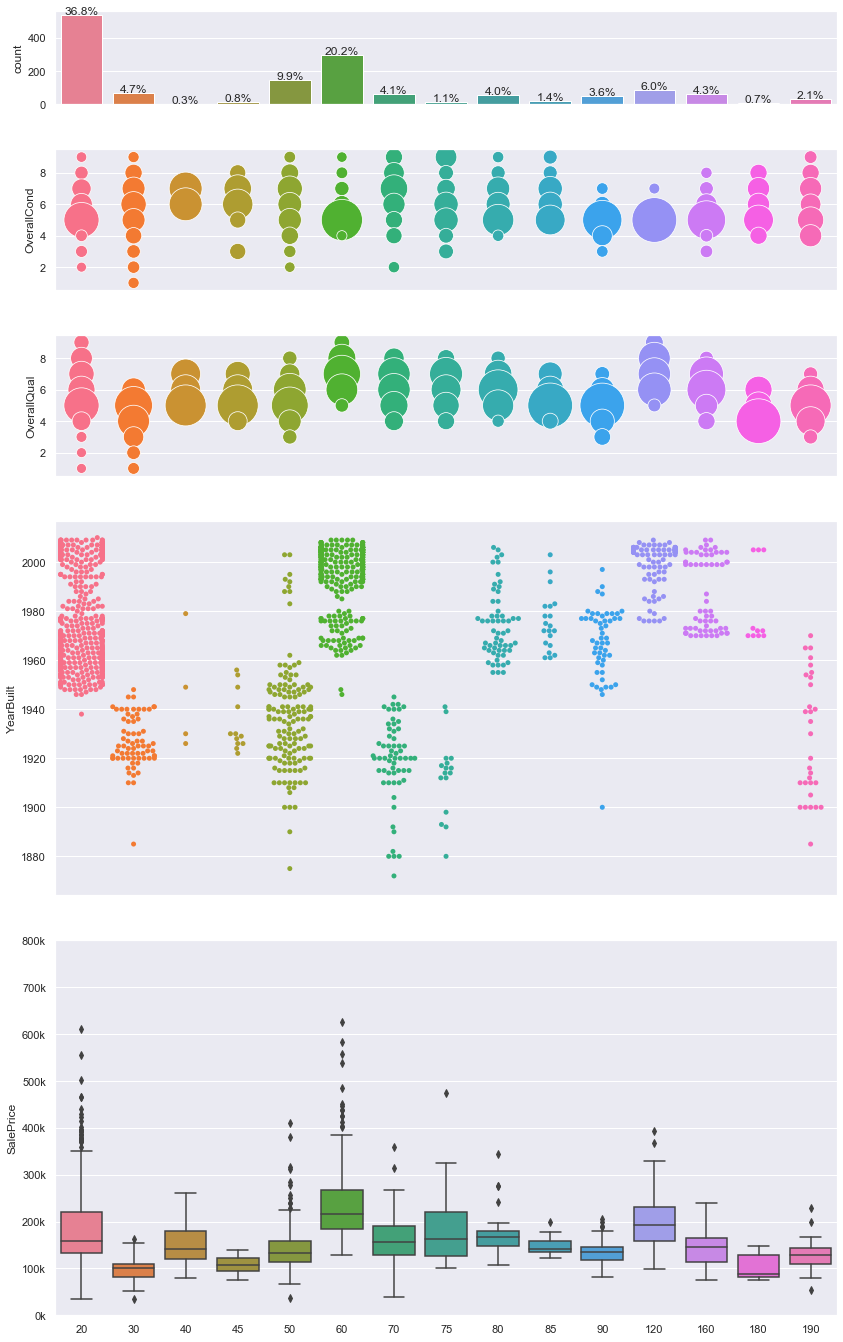

In [75]:
box_count_overall_condition_plot(col, df, [14,24], np.sort(df.loc[:,col].unique()))
plt.savefig("visualizations/{}_01.png".format(col), dpi=600, bbox_inches="tight")

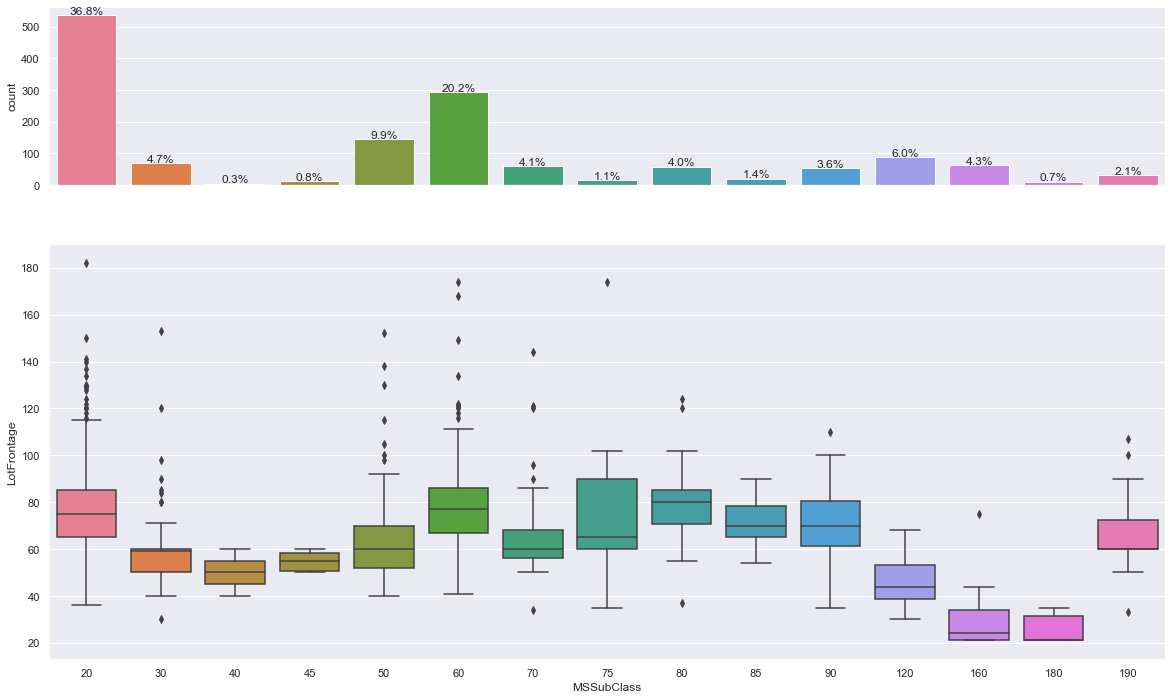

In [76]:
clr = sns.color_palette("husl", df[col].nunique())
fig, (ax_hist, ax_box) = plt.subplots(2, figsize=[20,12], sharex=True, gridspec_kw={"height_ratios": (.30, .70)})
sns.boxplot(x=col, y="LotFrontage", data=df, palette=clr, ax=ax_box)
sns.countplot(x=col, data=df, palette=clr, ax=ax_hist)
for p in ax_hist.patches:
    height = p.get_height()
    ax_hist.text(p.get_x()+p.get_width()/2., height + 3, '{:1.1f}%'.format(height/len(df)*100), ha="center")
ax_hist.set_xlabel(None)
plt.savefig("visualizations/{}_02.png".format(col), dpi=600, bbox_inches="tight")

### MSZoning

In [77]:
col = "MSZoning"

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

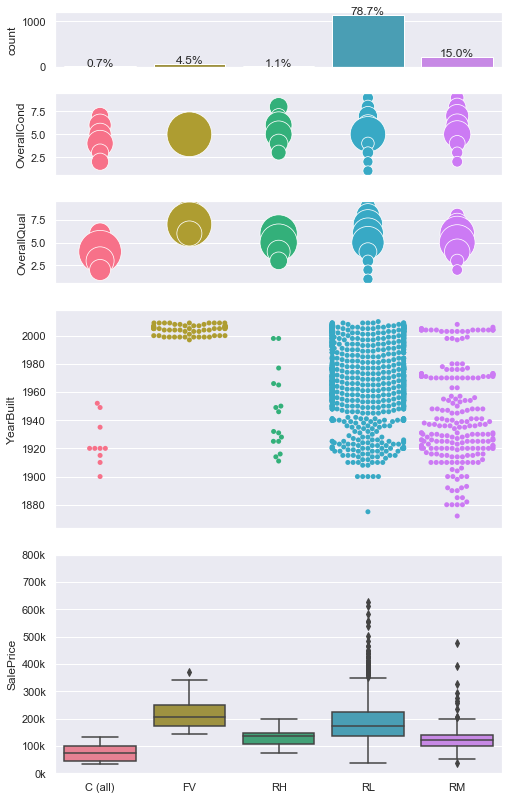

In [78]:
box_count_overall_condition_plot(col, df, [8,14], np.sort(df.loc[:,col].unique()))
plt.savefig("visualizations/{}_01.png".format(col), dpi=600, bbox_inches="tight")

### LotArea

In [79]:
col = "LotArea"

LotArea: Lot size in square feet

In [80]:
df[col].describe()

count      1454.000000
mean      10437.001376
std        9857.216562
min        1300.000000
25%        7536.250000
50%        9458.500000
75%       11576.250000
max      215245.000000
Name: LotArea, dtype: float64

In [81]:
df[df[col]>50000][col]

Id
54       50271
250     159000
314     215245
336     164660
385      53107
452      70761
458      53227
707     115149
770      53504
1397     57200
Name: LotArea, dtype: int64

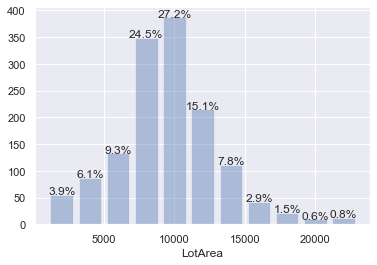

In [82]:
hist_percentage_plot(col, df[df[col]<25000], np.arange(2000, 26000, 2000)-1000)

([<matplotlib.axis.YTick at 0x284b808c160>,
 <a list of 0 Text yticklabel objects>)

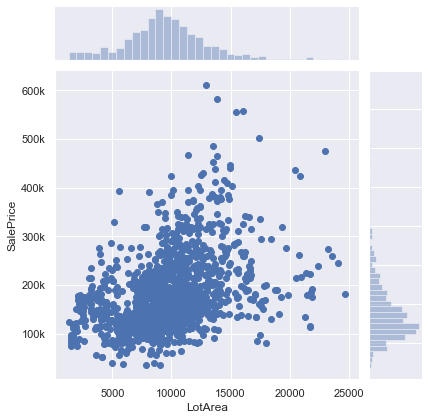

In [83]:
sns.jointplot(x=col, y=price, data=df[df[col]<25000])
plt.yticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))

([<matplotlib.axis.YTick at 0x284d4377320>,
 <a list of 0 Text yticklabel objects>)

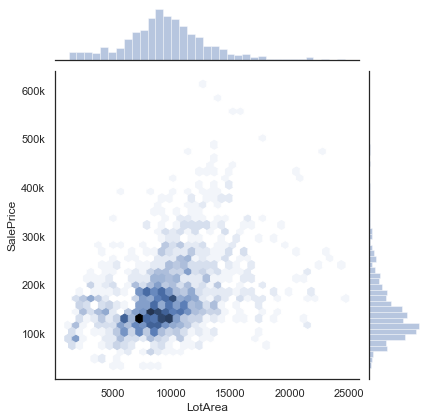

In [84]:
with sns.axes_style("white"):
    sns.jointplot(x=col, y=price, data=df[df[col]<25000], kind="hex")
plt.yticks(np.arange(100000, 900000, 100000), ("100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"))

In [85]:
#Deleting outliers
df = df.drop(df[(df["LotFrontage"]>250)].index)
df = df.drop(df[(df["LotArea"]>150000)].index)

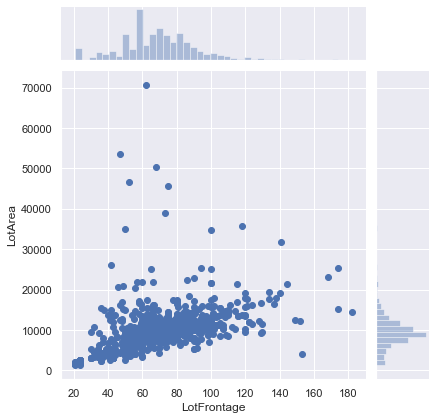

In [86]:
sns.jointplot(x="LotFrontage", y="LotArea", data=df)

### Lot shape

In [87]:
col = "LotShape"

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

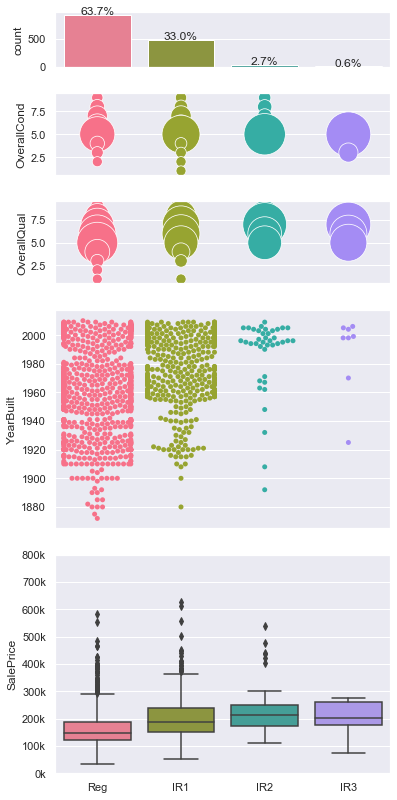

In [88]:
box_count_overall_condition_plot(col, df, [6,14], ["Reg","IR1","IR2","IR3"])

In [89]:
df2 = df[df["LotArea"]<100000]

Text(0.5, 0, '')

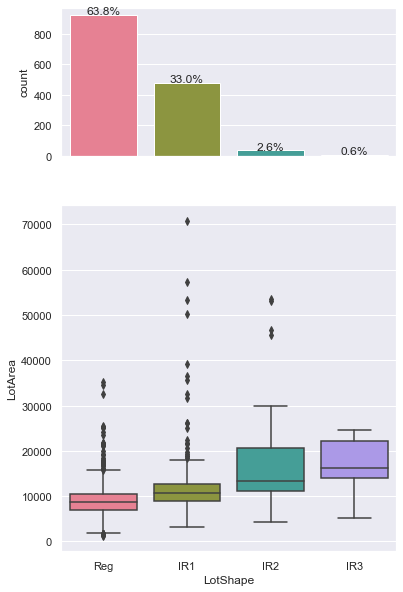

In [90]:
clr = sns.color_palette("husl", df2[col].nunique())
fig, (ax_hist, ax_box) = plt.subplots(2, figsize=[6,10], sharex=True, gridspec_kw={"height_ratios": (.30, .70)})
sns.boxplot(x=col, y="LotArea", data=df2, order=["Reg","IR1","IR2","IR3"], palette=clr, ax=ax_box)
sns.countplot(x=col, data=df2, order=["Reg","IR1","IR2","IR3"], palette=clr, ax=ax_hist)
for p in ax_hist.patches:
    height = p.get_height()
    ax_hist.text(p.get_x()+p.get_width()/2., height + 3, '{:1.1f}%'.format(height/len(df2)*100), ha="center")
ax_hist.set_xlabel(None)

### LandContour

In [91]:
col = "LandContour"

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

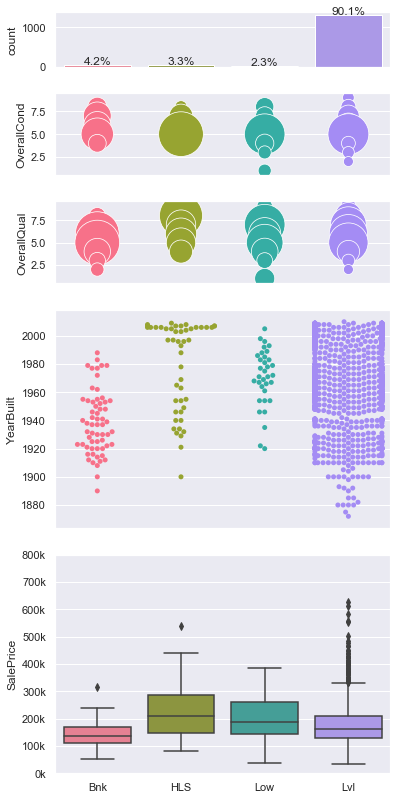

In [92]:
box_count_overall_condition_plot(col, df, [6,14], np.sort(df.loc[:,col].unique()))

### Utilities

In [93]:
col = "Utilities"

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

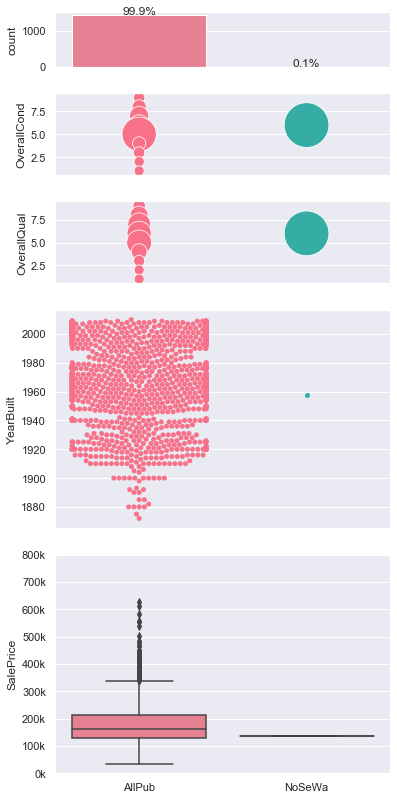

In [94]:
box_count_overall_condition_plot(col, df, [6,14], np.sort(df.loc[:,col].unique()))

In [95]:
df[df[col] == "NoSeWa"]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
945          20       RL          NaN    14375   Pave   NaN      IR1   

    LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                   ...                                     
945         Lvl    NoSeWa   CulDSac  ...        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                              
945       0      1    2009       COD        Abnorml     137500  

[1 rows x 80 columns]

Clearly we should remove this feature and building id 945.

In [96]:
# drop row
df = df.drop(df[(df[col] == "NoSeWa")].index)

### LotConfig

In [97]:
col = "LotConfig"

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

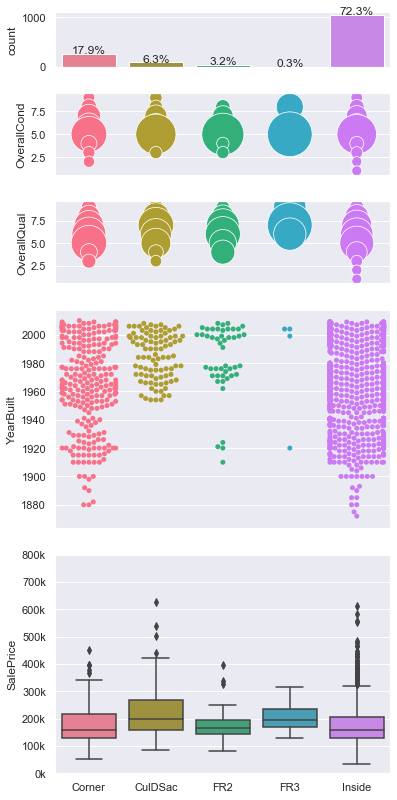

In [98]:
box_count_overall_condition_plot(col, df, [6,14], np.sort(df.loc[:,col].unique()))

In [99]:
df2 = df[df["LotFrontage"]<1000000]

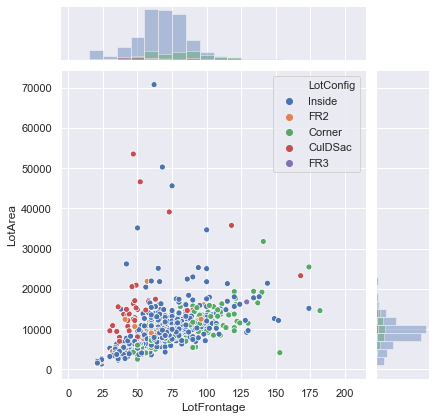

In [100]:
scatter_class_plot("LotFrontage", "LotArea", col, df2, np.arange(10,220,10)-5, np.arange(2000,26000,2000)-1000)

In [101]:
df2 = df2[df2[col].isin(["FR2", "Corner", "CulDSac", "FR3"])]

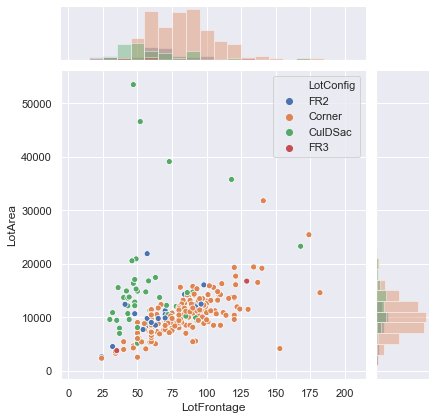

In [102]:
scatter_class_plot("LotFrontage", "LotArea", col, df2, np.arange(10,220,10)-5, np.arange(2000,26000,2000)-1000)

### LandSlope

In [103]:
col = "LandSlope"

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

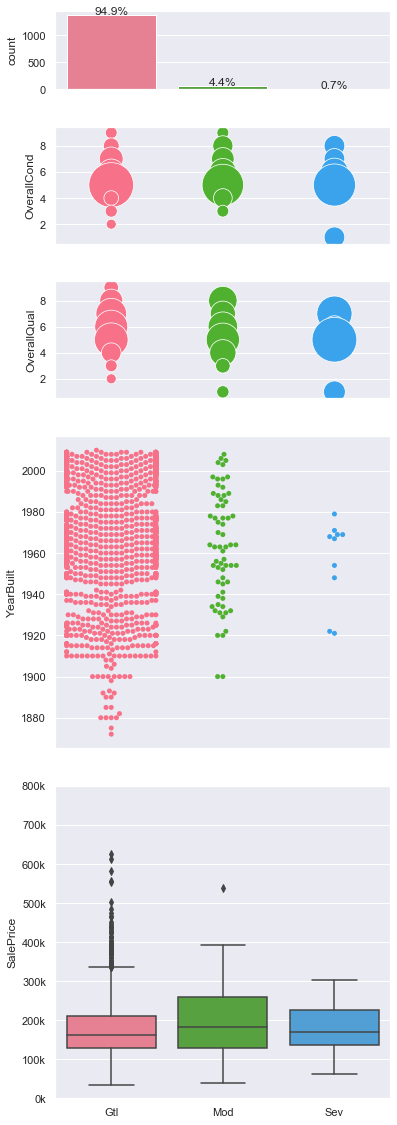

In [104]:
box_count_overall_condition_plot(col, df, [6,20], np.sort(df.loc[:,col].unique()))

### Neighborhood

In [105]:
col = "Neighborhood"

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

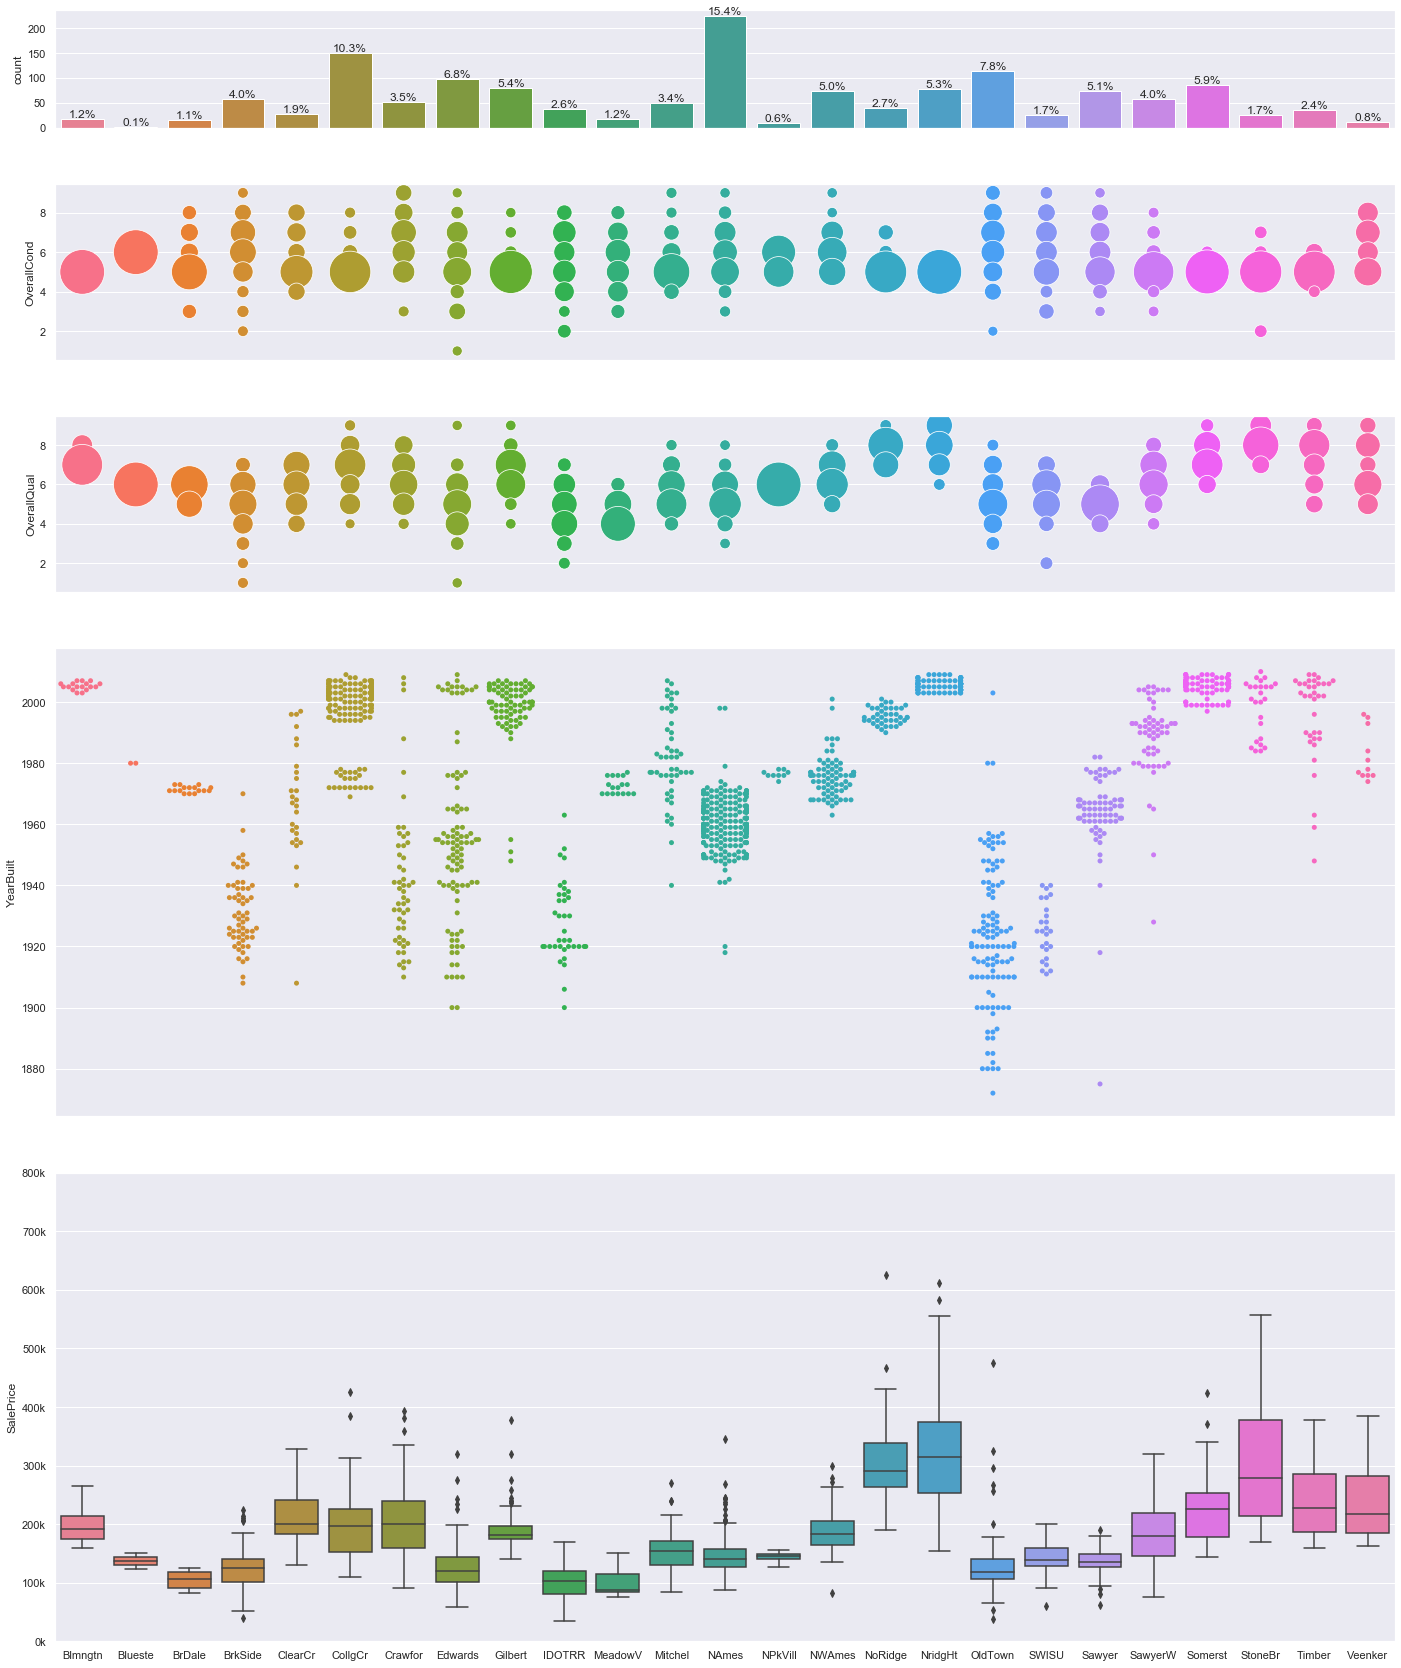

In [106]:
box_count_overall_condition_plot(col, df, [24,30], np.sort(df.loc[:,col].unique()))

In [107]:
df[[price,col]].groupby([col]).median().sort_values(by=price)

SalePrice
Neighborhood           
MeadowV           88000
IDOTRR           103000
BrDale           106000
OldTown          119000
Edwards          119500
BrkSide          124300
Sawyer           135000
Blueste          137500
SWISU            139500
NAmes            140000
NPkVill          146000
Mitchel          153500
SawyerW          179550
Gilbert          181000
NWAmes           182900
Blmngtn          191000
CollgCr          197200
ClearCr          200000
Crawfor          200624
Veenker          218000
Somerst          225500
Timber           228000
StoneBr          278000
NoRidge          290000
NridgHt          315000

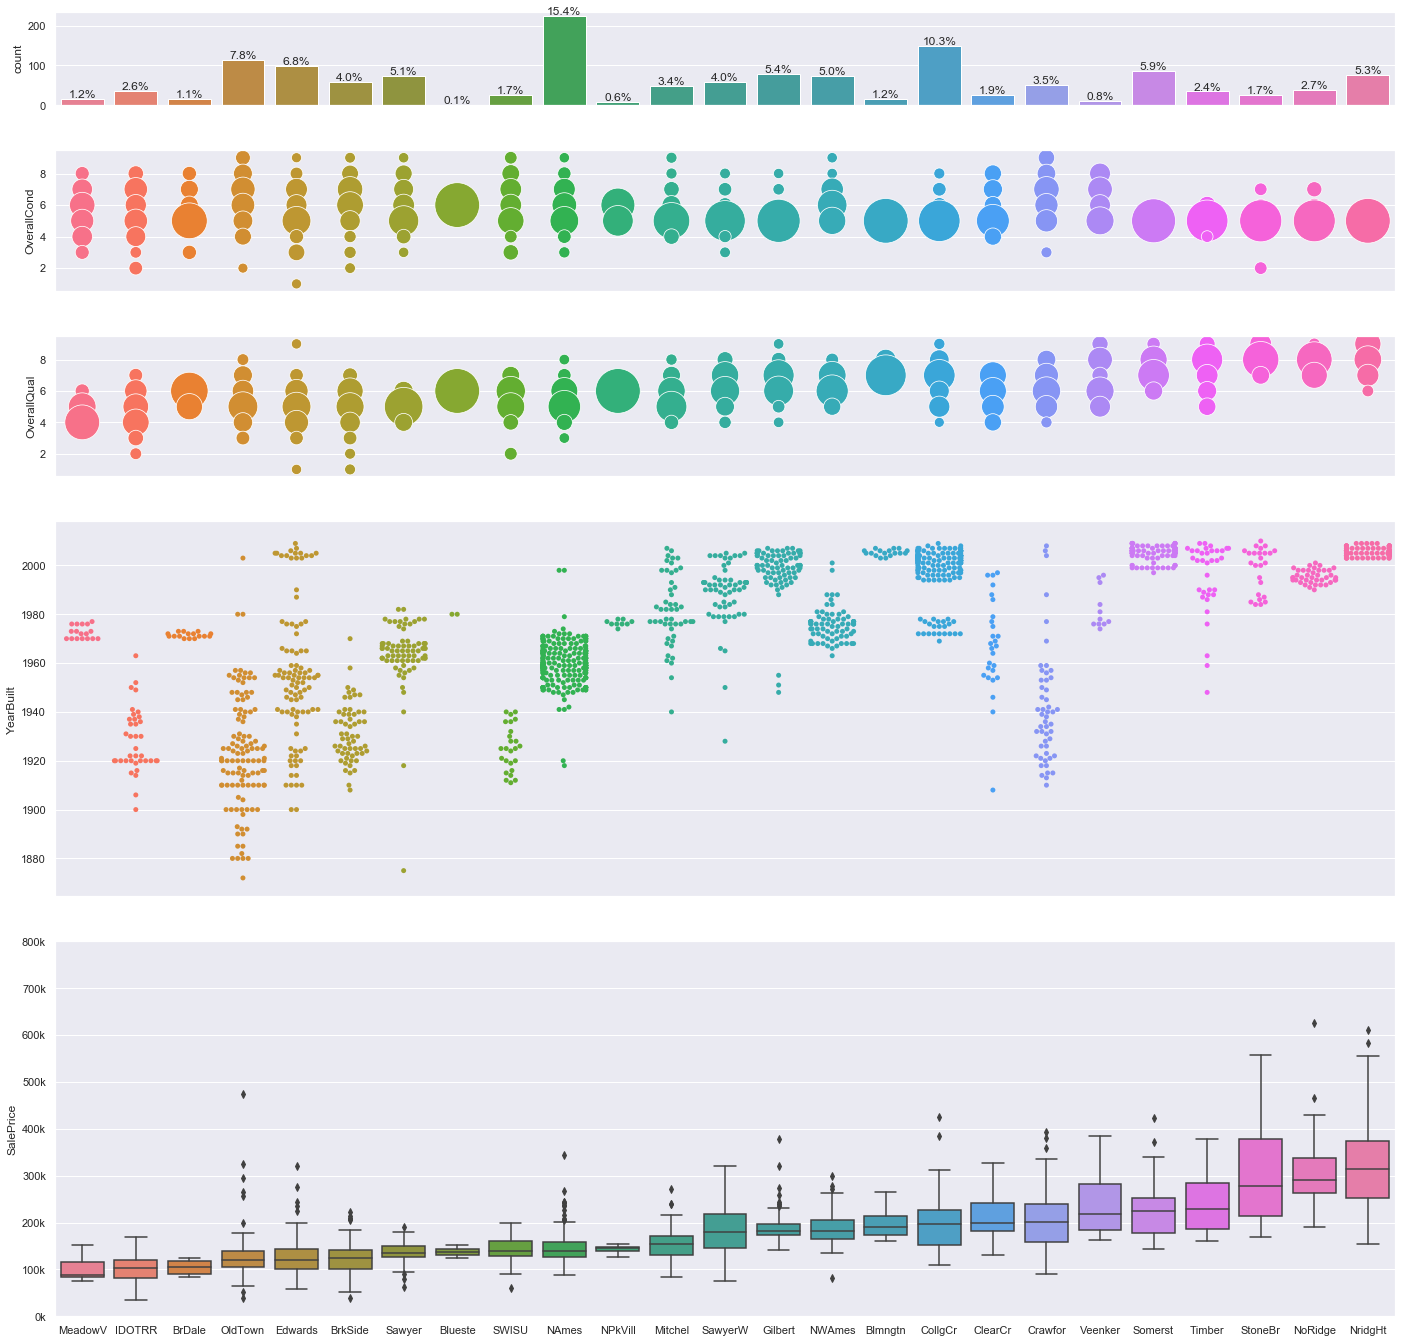

In [108]:
box_count_overall_condition_plot(col, df, [24,24], df[[price,col]].groupby([col]).median().sort_values(by=price).index)
plt.savefig("visualizations/{}_01.png".format(col), dpi=600, bbox_inches="tight")

This feature is really interesting. The neighborhood seems to have a huge impact on house price.

### YearBuilt

In [109]:
col = "YearBuilt"

YearBuilt: Original construction date

In [110]:
df[col].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

We can make a scatterplot to observe house price is terms of year built. To give two more dimensions we incorporate overall quality of the house in terms of colour and also the size of each plotpoint represents the TotRmsAbvGrd.

In [114]:
fig = px.scatter(df, x="YearBuilt", y="SalePrice", color="OverallQual", size="TotRmsAbvGrd")
fig.update_layout(title="Sale price by year scatterplot")
fig.show()

### Finalising
Check again the missing values, make note of columns whic are going to be dropped

In [115]:
missing_data(df).head(20)

Total NaN Values  Percentage of NaN Values
PoolQC                    1445                 99.655172
MiscFeature               1398                 96.413793
Alley                     1359                 93.724138
Fence                     1171                 80.758621
LotFrontage                256                 17.655172
GarageYrBlt                 81                  5.586207
MasVnrArea                   8                  0.551724
Electrical                   1                  0.068966
ExterCond                    0                  0.000000
RoofMatl                     0                  0.000000
Exterior1st                  0                  0.000000
Exterior2nd                  0                  0.000000
MasVnrType                   0                  0.000000
ExterQual                    0                  0.000000
BsmtExposure                 0                  0.000000
Foundation                   0                  0.000000
BsmtQual                     0                  0.000000
BsmtCond                     0                  0.000000
YearRemodAdd                 0                  0.000000
BsmtFinType1                 0                  0.000000

From above exploration we now know that we will be dropping following features: <br>
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
    'LotConfig', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle',
    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1',
    'BsmtFinType2', 'BsmtFinSF2', 'Heating','Electrical', 'GarageType', 'GarageYrBlt', 
    'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrArea'
<br>Remaining missing values will be filled in Processing step.

In [116]:
# save data for processing
df.to_csv("train_clean.csv")

In [117]:
df.shape

(1450, 80)